In [28]:
#notebook to fetch reanalysis used in example
import cdsapi
import pyart
import os
import sys
import netCDF4
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

In [39]:
#NOTE.. you need a key from ECMWF

#populate ~/.cdsapirc with

#url: https://cds.climate.copernicus.eu/api/v2
#key: YOURKEYHASH


In [13]:

def make_a_request(year, month, day, area):
    request = {'product_type': 'reanalysis',
               'format': 'netcdf',
               'variable': [
                   'divergence', 'fraction_of_cloud_cover', 'geopotential',
                   'potential_vorticity', 'relative_humidity',
                   'specific_cloud_ice_water_content', 'specific_cloud_liquid_water_content', 'specific_humidity',
                   'specific_rain_water_content', 'specific_snow_water_content', 'temperature',
                   'u_component_of_wind', 'v_component_of_wind', 'vertical_velocity',
                   'vorticity'
               ],
               'pressure_level': [
                   '1', '2', '3',
                   '5', '7', '10',
                   '20', '30', '50',
                   '70', '100', '125',
                   '150', '175', '200',
                   '225', '250', '300',
                   '350', '400', '450',
                   '500', '550', '600',
                   '650', '700', '750',
                   '775', '800', '825',
                   '850', '875', '900',
                   '925', '950', '975',
                   '1000'
               ],
               'year': year,
               'month': month,
               'day': day,
               'area': area,#"37.00/-94.00/24.00/-75.00"[60, -10, 50, 2], # North, West, South, East. Default: global
               'time': [
                   '00:00', '01:00', '02:00',
                   '03:00', '04:00', '05:00',
                   '06:00', '07:00', '08:00',
                   '09:00', '10:00', '11:00',
                   '12:00', '13:00', '14:00',
                   '15:00', '16:00', '17:00',
                   '18:00', '19:00', '20:00',
                   '21:00', '22:00', '23:00'
               ]
               }

    return request

In [3]:
radar = pyart.aux_io.read_odim_h5(os.path.expanduser('~/data/20171230/20171230_172408_FAIRS.h5'))

In [9]:
radartime = netCDF4.num2date(0, radar.time['units'])

In [11]:
lats = radar.gate_latitude
lons = radar.gate_longitude

min_lon = lons['data'].min()
min_lat = lats['data'].min()
max_lat = lats['data'].max()
max_lon = lons['data'].max()


In [8]:
datetime.year

2017

In [14]:
c = cdsapi.Client()
myreq = make_a_request(radartime.year, radartime.month, radartime.day, [max_lat, min_lon, min_lat, max_lon])
c.retrieve("reanalysis-era5-pressure-levels",
                   myreq, os.path.expanduser('~/data/era5_data.nc'))

2019-08-22 09:33:15,043 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2019-08-22 09:33:15,511 INFO Request is queued
2019-08-22 09:33:16,622 INFO Request is running
2019-08-22 09:39:35,169 INFO Request is completed
2019-08-22 09:39:35,170 INFO Downloading http://136.156.132.210/cache-compute-0005/cache/data7/adaptor.mars.internal-1566484395.6162243-25414-13-e09cd1db-b4dd-4caa-8d82-c6023025c4d6.nc to /Users/scollis/data/era5_data.nc (5.7M)
2019-08-22 09:39:36,680 INFO Download rate 3.8M/s   


Result(content_length=5972884,content_type=application/x-netcdf,location=http://136.156.132.210/cache-compute-0005/cache/data7/adaptor.mars.internal-1566484395.6162243-25414-13-e09cd1db-b4dd-4caa-8d82-c6023025c4d6.nc)

In [17]:
dset = xr.load_dataset(os.path.expanduser('~/data/era5_data.nc'))

In [22]:
dset

<xarray.Dataset>
Dimensions:    (latitude: 14, level: 37, longitude: 16, time: 24)
Coordinates:
  * longitude  (longitude) float32 26.25 26.5 26.75 27.0 ... 29.5 29.75 30.0
  * latitude   (latitude) float32 -24.25 -24.5 -24.75 ... -27.0 -27.25 -27.5
  * level      (level) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
  * time       (time) datetime64[ns] 2017-12-30 ... 2017-12-30T23:00:00
Data variables:
    d          (time, level, latitude, longitude) float32 1.3999203e-05 ... 6.235679e-05
    cc         (time, level, latitude, longitude) float32 0.0 0.0 ... 0.0
    z          (time, level, latitude, longitude) float32 469350.2 ... 1175.1562
    pv         (time, level, latitude, longitude) float32 -0.0019375873 ... 9.0454705e-08
    r          (time, level, latitude, longitude) float32 0.0001296997 ... 94.81407
    ciwc       (time, level, latitude, longitude) float32 -5.820766e-11 ... -5.820766e-11
    clwc       (time, level, latitude, longitude) float32 2.910383e-11 ..

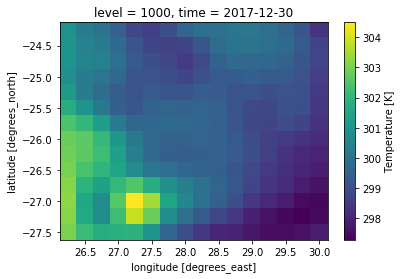

In [25]:
dset.t[0].sel(level=1000, method='nearest').plot.pcolormesh()

In [35]:
cprof = dset.sel(longitude=28.5, latitude=-26.0, method='nearest')

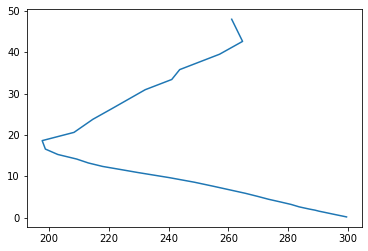

In [36]:
plt.plot( cprof.t[0], cprof.z[0]/(9.8*1000.0))

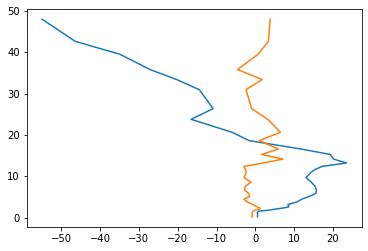

In [38]:
plt.plot( cprof.u[0], cprof.z[0]/(9.8*1000.0))
plt.plot( cprof.v[0], cprof.z[0]/(9.8*1000.0))
